# Imports and Setup

In [3]:
#%pip install transformers

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import transformers
from transformers import pipeline

In [5]:
df = pd.read_csv('data/updated_df.csv')
df
### From Other Notebook
df['Date'] = df['Date'].astype('datetime64[ns]')
df = df.drop_duplicates('Reviews')
# All Osteoporosis Illnesses in Female Patients
df = df[df['Condition'].str.contains("osteoporosis", case = False)]

In [6]:
classifier  = pipeline("zero-shot-classification",  model = "facebook/bart-large-mnli")

In [ ]:
res = classifier(
    sample_review,
    candidate_labels = ['menstruation', 'digestive', 'joint pain', 'respiratory' , 'heart', 'skin'], 
    multi_class = True
)
res

The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


{'sequence': 'This osteoporosis medicine worked, but it gave me a nasty stomach ache. It was easy to swallow.',
 'labels': ['digestive',
  'joint pain',
  'skin',
  'respiratory',
  'menstruation',
  'heart'],
 'scores': [0.27356016635894775,
  0.0006058795261196792,
  0.0001192762065329589,
  7.208560418803245e-05,
  5.108026016387157e-05,
  4.157235161983408e-05]}

# Expermenting with the Model

In [7]:
#A sample review that contains a) whether the medicine worked b) the type of side effect and c) the delivery method (pill)

sample_review = "This osteoporosis medicine worked, but it gave me a nasty stomach ache. It was easy to swallow."


###  Categories for types of Side-Effects: 

Definite: Disgestive (most of the side effects listed are disgestive), Respiratory (some of the reviews mention a cough)

Still tweaking with "pain", perhaps "joint pain" would work better as it doesn't include a stomach ache for example, but then you are missing out on headaches. 

"heart", "skin" and "menstruation" important but don't show up in the data as much 

In [9]:
res = classifier(
    sample_review,
    candidate_labels = ['medicine side effects', 'medicine effectiveness'], 
    multi_class = True
)
res

The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


{'sequence': 'This osteoporosis medicine worked, but it gave me a nasty stomach ache. It was easy to swallow.',
 'labels': ['medicine side effects', 'medicine effectiveness'],
 'scores': [0.9826341867446899, 0.6695783138275146]}

In [10]:
res = classifier(
    sample_review,
    candidate_labels = ['pill', 'injection', 'patch'], 
    multi_class = True
)
res

The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.


{'sequence': 'This osteoporosis medicine worked, but it gave me a nasty stomach ache. It was easy to swallow.',
 'labels': ['pill', 'injection', 'patch'],
 'scores': [0.18327894806861877, 0.001308804377913475, 0.0011016776552423835]}

# Adding Classification to the DataFrame

Values for the categories. A first run until we get some output and mine for some more words

In [38]:
#sides = ['menstruation', 'digestive', 'joint pain', 'respiratory' , 'heart', 'skin']
#sides_min = ['disgestive', 'joint pain', 'respiratory']
sides = ['menstruation', 'gastrointestinal problems', 'joint pain', 'respiratory issues' , 'cardiac problems', 'dermatology issues']
sides_min = ['pain', 'sickness', 'death', 'discomfort']
method = ['pill', 'injection', 'patch']
general = ['medicine side effects', 'medicine effectiveness']

Multi-class zero-shot of Different Side Effects

In [39]:
#setting empty values for the columns
index = -1
for label in sides:
    df[label + '_m'] = -1

for j in range(len(df)):
    #counter for progress/debugging
    index+=1
    if(index%50 == 0): 
        print(index)
    #running the classifier on the column    
    res = classifier(
        df.iloc[j]['Reviews'],
        candidate_labels = sides,
        multi_label = True
    )
    #setting the column values according to the output from the classifier ("_m" = multiclass)
    for i in range(len(res['labels'])):
        df[res['labels'][i]+ '_m'].iloc[j] = res['scores'][i]

0


C:\Users\Blaise.Derenze\AppData\Local\Temp\ipykernel_5728\1592980030.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[res['labels'][i]+ '_m'].iloc[j] = res['scores'][i]


50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350


In [52]:
#setting empty values for the columns
index = -1
for label in sides_min:
    df[label + '_m'] = -1

for j in range(len(df)):
    #counter for progress/debugging
    index+=1
    if(index%50 == 0): 
        print(index)
    #running the classifier on the column    
    res = classifier(
        df.iloc[j]['Reviews'],
        candidate_labels = sides_min,
        multi_label = True
    )
    #setting the column values according to the output from the classifier ("_m" = multiclass)
    for i in range(len(res['labels'])):
        df[res['labels'][i]+ '_m'].iloc[j] = res['scores'][i]

0


C:\Users\Blaise.Derenze\AppData\Local\Temp\ipykernel_5728\1983885156.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[res['labels'][i]+ '_m'].iloc[j] = res['scores'][i]


50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350


In [53]:
df.to_csv('data/updated_df.csv')

Multi-class zero-shot of General Topic

In [ ]:
index = -1
for label in general:
    df[label + '_m'] = -1
for j in range(len(df)):
    index+=1
    if(index%50 == 0): 
        print(index)    
    res = classifier(
        df.iloc[j]['Reviews'],
        candidate_labels = general,
        multi_label = True
    )

    for i in range(len(res['labels'])):
        df[res['labels'][i]+ '_m'].iloc[j] = res['scores'][i]

0


C:\Users\Blaise.Derenze\AppData\Local\Temp\ipykernel_24472\1360088911.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[res['labels'][i]+ '_m'].iloc[j] = res['scores'][i]


50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350


In [ ]:
df.to_csv('data/updated_df.csv')

Multi-class zero-shot of Different Delivery Methods

In [ ]:
index = -1
for label in method:
    df[label + '_m'] = -1
for j in range(len(df)):
    index+=1
    if(index%50 == 0): 
        print(index)    
    res = classifier(
        df.iloc[j]['Reviews'],
        candidate_labels = method,
        multi_label = True
    )

    for i in range(len(res['labels'])):
        df[res['labels'][i]+ '_m'].iloc[j] = res['scores'][i]

0


C:\Users\Blaise.Derenze\AppData\Local\Temp\ipykernel_29864\428920719.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[res['labels'][i]+ '_m'].iloc[j] = res['scores'][i]


50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350


In [ ]:
df.to_csv('data/updated_df.csv')

Single-class zero-shot of Side Effects

In [ ]:
index = -1
for j in range(len(df)):
    index+=1
    if(index%50 == 0): 
        print(index)    
    res = classifier(
        df.iloc[j]['Reviews'],
        candidate_labels = sides,
        multi_label = True
    )

    for i in range(len(res['labels'])):
        df[res['labels'][i]+ '_s'].iloc[j] = res['scores'][i]

In [ ]:
df.to_csv('data/updated_df.csv')

Single-class zero-shot of General Topic

In [ ]:
index = -1
for j in range(len(df)):
    index+=1
    if(index%50 == 0): 
        print(index)    
    res = classifier(
        df.iloc[j]['Reviews'],
        candidate_labels = general,
        multi_label = True
    )

    for i in range(len(res['labels'])):
        df[res['labels'][i]+ '_s'].iloc[j] = res['scores'][i]

In [ ]:
df.to_csv('data/updated_df.csv')

Multi-class zero-shot of Different Delivery Methods

In [ ]:
index = -1
for j in range(len(df)):
    index+=1
    if(index%50 == 0): 
        print(index)   
    res = classifier(
        df.iloc[j]['Reviews'],
        candidate_labels = method,
        multi_label = True
    )

    for i in range(len(res['labels'])):
        df[res['labels'][i]+ '_s'].iloc[j] = res['scores'][i]

In [ ]:
df.to_csv('data/updated_df.csv')

# Updated Visuals


In [43]:
vis_df = pd.read_csv('data/updated_df.csv')

In [44]:
import seaborn as sn
bin_size = 20

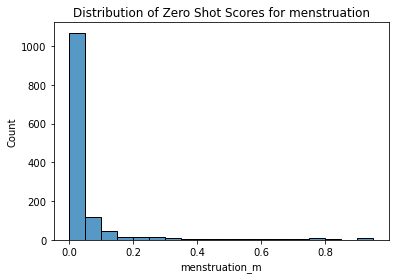

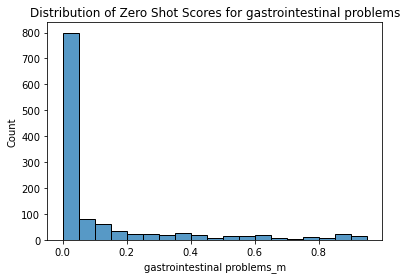

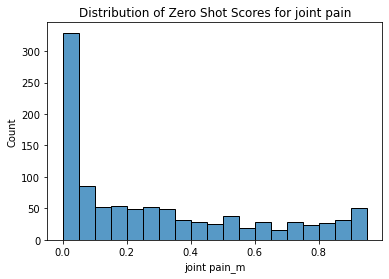

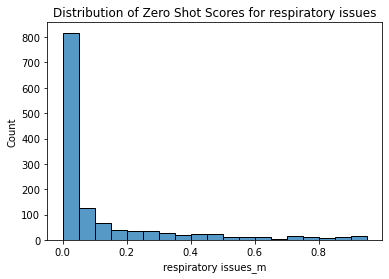

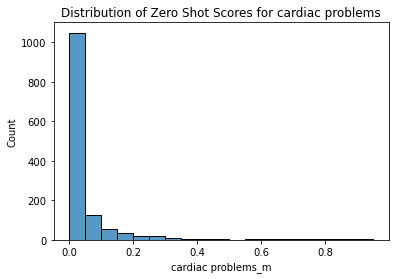

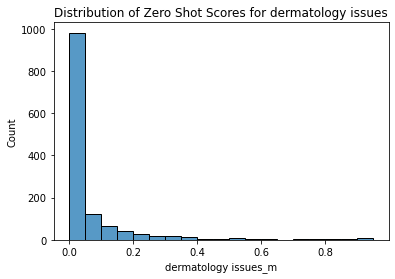

In [45]:

bins = list(range(0,bin_size))
hbins = [item/len(bins) for item in bins]
for topic in sides:
    plt.title('Distribution of Zero Shot Scores for ' + topic)
    sns.histplot(x = topic+"_m", data = vis_df, bins = hbins)
    plt.show()

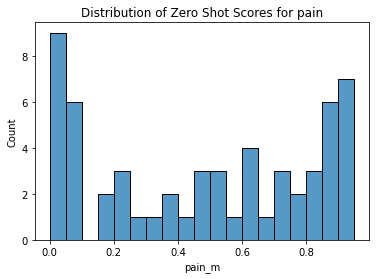

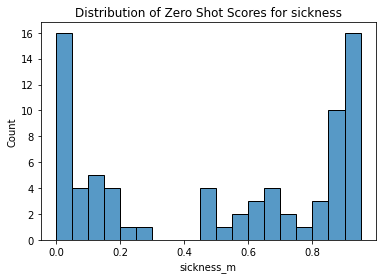

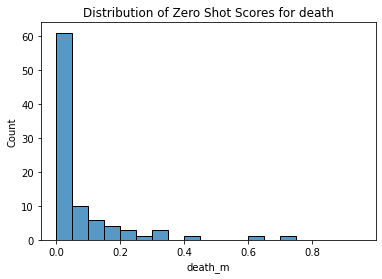

In [54]:

bins = list(range(0,bin_size))
hbins = [item/len(bins) for item in bins]
for topic in sides_min:
    plt.title('Distribution of Zero Shot Scores for ' + topic)
    sns.histplot(x = topic+"_m", data = vis_df, bins = hbins)
    plt.show()

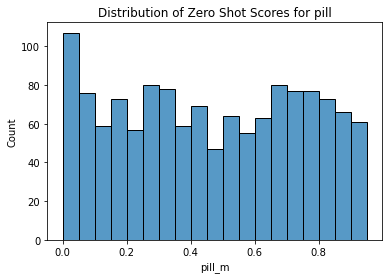

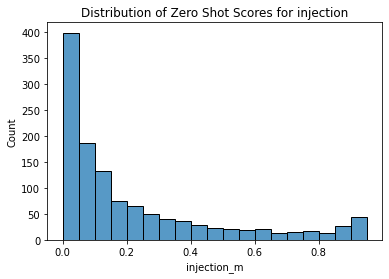

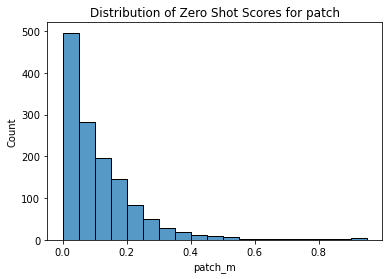

In [47]:

bins = list(range(0,bin_size))
hbins = [item/len(bins) for item in bins]
for topic in method:
    plt.title('Distribution of Zero Shot Scores for ' + topic)
    sns.histplot(x = topic+"_m", data = vis_df, bins = hbins)
    plt.show()

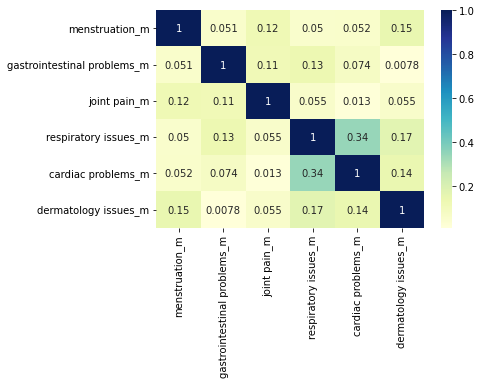

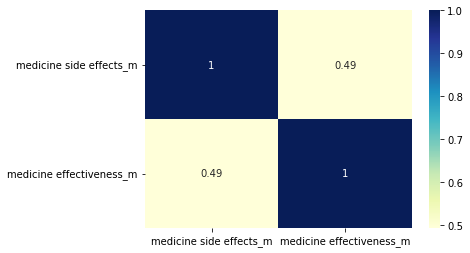

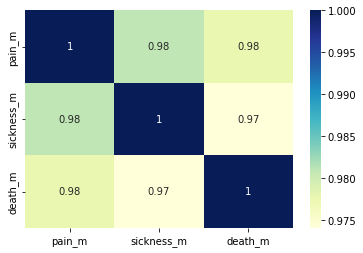

<AxesSubplot:>

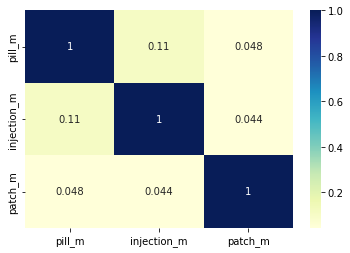

In [55]:
sides_m = [side + "_m" for side in sides]
sides_min_m = [side + "_m" for side in sides_min]

gen_m = [gen + "_m" for gen in general]
met_m = [met + "_m" for met in method]

sn.heatmap(vis_df[sides_m].corr().apply(abs), cmap="YlGnBu", annot=True)
plt.show()
sn.heatmap(vis_df[gen_m].corr().apply(abs), cmap="YlGnBu", annot=True)
plt.show()
sn.heatmap(vis_df[sides_min_m].corr().apply(abs), cmap="YlGnBu", annot=True)
plt.show()
sn.heatmap(vis_df[met_m].corr().apply(abs), cmap="YlGnBu", annot=True)


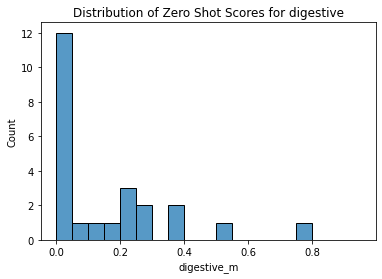

'#distribution of the column in a binned histogram for good reviews/bad reviews\n\nbad_df = use_df[use_df[\'Satisfaction\']<3]\nbad_df.sort_values([\'Age\'], ascending=[True])\n\ngood_df = use_df[use_df[\'Satisfaction\'] >3]\ngood_df.sort_values([\'Age\'], ascending=[True])\n\nbins = list(range(0,bin_size))\nhbins = [item/len(bins) for item in bins]\n\nplt.title(\'Distribution of Zero Shot Scores for \' + column + "for bad reviews")\nsns.histplot(x = column+"_m", data = bad_df, bins = hbins)\nplt.show()\n\nbins = list(range(0,bin_size))\nhbins = [item/len(bins) for item in bins]\n\nplt.title(\'Distribution of Zero Shot Scores for \' + column + "for good reviews")\nsns.histplot(x = column+"_m", data = good_df, bins = hbins)\nplt.show()'

In [49]:
use_df = vis_df
column = "digestive"
bin_size = 20

#distribution of the column in a binned histogram

bins = list(range(0,bin_size))
hbins = [item/len(bins) for item in bins]

plt.title('Distribution of Zero Shot Scores for ' + column)
sns.histplot(x = column+"_m", data = vis_df, bins = hbins)
plt.show()

#distribution of the column in a binned histogram for good reviews/bad reviews

vis_df[]

bins = list(range(0,bin_size))
hbins = [item/len(bins) for item in bins]

plt.title('Distribution of Zero Shot Scores for ' + column + "for bad reviews")
sns.histplot(x = column+"_m", data = bad_df, bins = hbins)
plt.show()

bins = list(range(0,bin_size))
hbins = [item/len(bins) for item in bins]

plt.title('Distribution of Zero Shot Scores for ' + column + "for good reviews")
sns.histplot(x = column+"_m", data = good_df, bins = hbins)
plt.show()


#top n-grams associated with the reviews in this category/weighted by this category

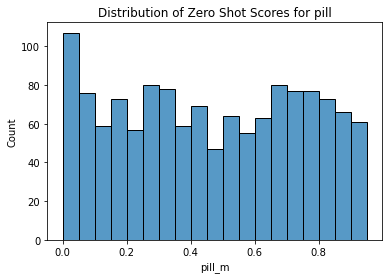

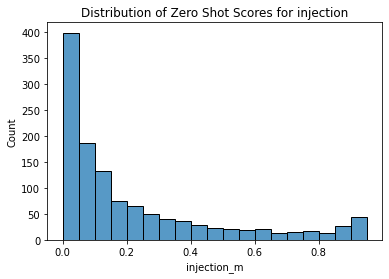

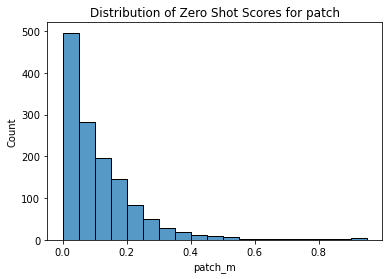

In [50]:
for topic in method:
    plt.title('Distribution of Zero Shot Scores for ' + topic)
    sns.histplot(x = topic+"_m", data = vis_df, bins = hbins)
    plt.show()

In [51]:
for el in vis_df.sort_values(by= "heart_m",ascending = False)['Reviews']:
    #print(el)
    res = classifier(
        el,
        candidate_labels = nsides,
        multi_label = True
    )
    print(res)

    

{'sequence': 'I am 64 years old, and am trying to avoid loss of bone.  My Doctor suggested I take calcium plus D.  OS-CAL ultra has always worked very well.  For a few months I could not find OS-CAL anywhere on pharmacy shelves. When I started taking the 600 plus D I was elated.  Now 2 weeks later I am having a reaction to the coating on the tablets.  I have been allergic to Reds and Yellow dyes for ages (20 years), the tablets appear gray in color, but upon reading the back label I discovered red 40 lake along with blue 2 lake.  My someone please contace GlazoSmithKline and ask IF they even make a all white tablet or send me the info. and I will call them.\r\nYours, \r\nJackie Ann Bowen\r\n606-215-7276', 'labels': ['joint pain', 'dermatology issues', 'menstruation', 'respiratory issues', 'gastrointestinal problems', 'cardiac problems'], 'scores': [0.30547019839286804, 0.0761035680770874, 0.019611215218901634, 0.009035296738147736, 0.004909390117973089, 0.0015356630319729447]}
{'sequen

KeyboardInterrupt: 

In [ ]:
vis_df['heart_m'].corr(vis_df['injection_m'])

0.1176715133268518

In [ ]:
['menstruation', 'digestive', 'joint pain', 'respiratory' , 'heart', 'skin']
nsides = ['menstruation', 'gastrointestinal problems', 'joint pain', 'respiratory issues' , 'cardiac problems', 'dermatology issues']

#nsides = copy(sides).remove('heart')
txt = "I had my first reclast injection on may 3rd 2010 and several hours after coming home,I started having severe pain throughout my whole body.The pain was so bad,I couldn't tolerate to even move.The next morning,May 4th.I started feeling a little better and on may 5th,I was doing fine.Yesterday,May 8th.,The pain had returned and as I sit here typing this on Mother's day.Iam in so much pain I can hardly type.I regret ever doing this Reclast injection.I would never recommend it to anyone"
print(classifier(
    txt,
        candidate_labels = sides,
        multi_label = True
))
txt = "I had my first reclast injection on may 3rd 2010 and several hours after coming home,I started having severe pain throughout my whole body.The pain was so bad,I couldn't tolerate to even move.The next morning,May 4th.I started feeling a little better and on may 5th,I was doing fine.Yesterday,May 8th.,The pain had returned and as I sit here typing this on Mother's day.Iam in so much pain I can hardly type.I regret ever doing this Reclast injection.I would never recommend it to anyone"
classifier(
    txt,
        candidate_labels = nsides,
        multi_label = True
)

{'sequence': "I had my first reclast injection on may 3rd 2010 and several hours after coming home,I started having severe pain throughout my whole body.The pain was so bad,I couldn't tolerate to even move.The next morning,May 4th.I started feeling a little better and on may 5th,I was doing fine.Yesterday,May 8th.,The pain had returned and as I sit here typing this on Mother's day.Iam in so much pain I can hardly type.I regret ever doing this Reclast injection.I would never recommend it to anyone", 'labels': ['heart', 'joint pain', 'digestive', 'respiratory', 'skin', 'menstruation'], 'scores': [0.9280623197555542, 0.907379686832428, 0.516777515411377, 0.44605934619903564, 0.40230002999305725, 0.052238862961530685]}


{'sequence': "I had my first reclast injection on may 3rd 2010 and several hours after coming home,I started having severe pain throughout my whole body.The pain was so bad,I couldn't tolerate to even move.The next morning,May 4th.I started feeling a little better and on may 5th,I was doing fine.Yesterday,May 8th.,The pain had returned and as I sit here typing this on Mother's day.Iam in so much pain I can hardly type.I regret ever doing this Reclast injection.I would never recommend it to anyone",
 'labels': ['joint pain',
  'gastrointestinal problems',
  'cardiac problems',
  'respiratory issues',
  'dermatology issues',
  'menstruation'],
 'scores': [0.907379686832428,
  0.2649693489074707,
  0.257427453994751,
  0.15841467678546906,
  0.15459315478801727,
  0.052238862961530685]}

In [ ]:
txt = "skin rash"
classifier(
    txt,
        candidate_labels = nsides,
        multi_label = True
)

{'sequence': 'skin rash',
 'labels': ['dermatology issues',
  'menstruation',
  'respiratory issues',
  'gastrointestinal problems',
  'joint pain',
  'cardiac problems'],
 'scores': [0.9677680134773254,
  0.016145670786499977,
  0.0004925400717183948,
  0.0003240013320464641,
  0.00022580182121600956,
  6.443886377383024e-05]}

# Old Visuals

The code takes a while to run (and I have yet to get a good run with these updated categories), but I have some data from a couple of runs earlier that I can use to display some of the results. 

In [ ]:
labeled_df = pd.read_csv('data/preproc_with_labels.csv')

In [ ]:
old_sides = ['respiratory', 'pain', 'disgestive', 'bone', 'menstruation']
labeled_df['category_s'] = ' '
for i in range(len(labeled_df)):
    row = labeled_df.iloc[i]
    values = list(row[['respiratory', 'pain', 'disgestive', 'bone', 'menstruation']])
    labeled_df['category_s'].iloc[i] = old_sides[values.index(max(values))]

C:\Users\Blaise.Derenze\AppData\Local\Temp\ipykernel_4460\1359016727.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labeled_df['category_s'].iloc[i] = old_sides[values.index(max(values))]
C:\Users\Blaise.Derenze\AppData\Local\Temp\ipykernel_4460\1359016727.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labeled_df['category_s'].iloc[i] = old_sides[values.index(max(values))]
C:\Users\Blaise.Derenze\AppData\Local\Temp\ipykernel_4460\1359016727.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

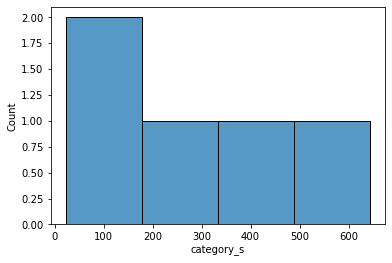

In [ ]:
sns.histplot(labeled_df['category_s'].value_counts())
plt.show()

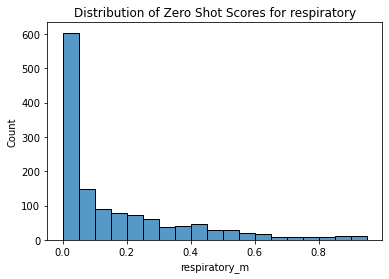

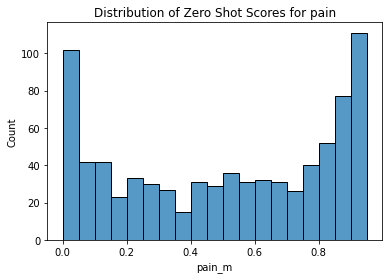

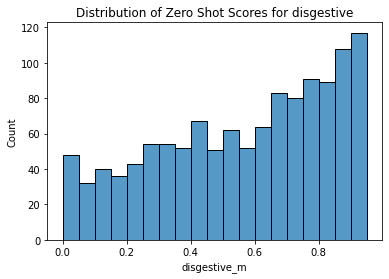

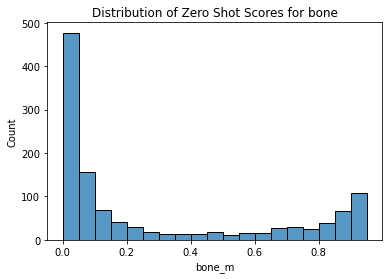

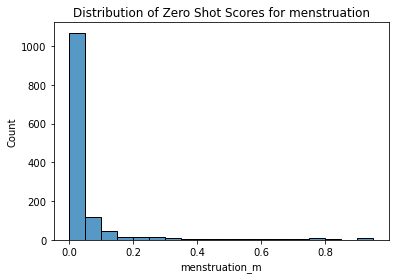

In [ ]:
bins = list(range(0,20))
hbins = [item/len(bins) for item in bins]
for topic in old_sides:
    plt.title('Distribution of Zero Shot Scores for ' + topic)
    sns.histplot(x = topic+"_m", data = labeled_df, bins = hbins)
    plt.show()